# **Hospital Length of Stay (LOS) Prediction**


----------------
## **Context** 
----------------

Hospital management is a vital area that gained a lot of attention during the COVID-19 pandemic. **Inefficient distribution of resources like beds, and ventilators might lead to a lot of complications**. However, this can be mitigated by **predicting the length of stay (LOS) of a patient before getting admitted**. Once this is determined, the hospital can plan a suitable treatment, resources, and staff to reduce the LOS and increase the chances of recovery. The rooms and beds can also be planned in accordance with that.

**HealthPlus hospital has been incurring a lot of losses in revenue and life due to its inefficient management system.** They have been unsuccessful in allocating pieces of equipment, beds, and hospital staff fairly. **A system that could estimate the length of stay (LOS) of a patient can solve this problem to a great extent.**

------------------
## **Objective**
------------------

As a Data Scientist, you have been hired by HealthPlus to analyze the data, find out **what factors affect the LOS the most, and come up with a machine learning model which can predict the LOS of a patient**, using the data available during admission and after running a few tests. Also, **bring about useful insights and policies from the data, which can help the hospital to improve their health care infrastructure and revenue.**

--------------------------
## **Data Dictionary**
--------------------------

The data contains various information recorded during the time of admission of the patient. It only contains **records of patients who were admitted to the hospital.** The detailed data dictionary is given below:

* **patientid**: Patient ID
* **Age**: Range of age of the patient
* **gender**: Gender of the patient
* **Type of Admission**: Trauma, emergency, or urgent
* **Severity of Illness**: Extreme, moderate, or minor
* **health_condition**s: Any previous health conditions suffered by the patient
* **Visitors with Patient**: The number of patients who accompany the patient
* **Insurance**: Does the patient have health insurance or not?
* **Admission_Deposit**: The deposit paid by the patient during the admission
* **Stay (in days)**: The number of days that the patient has stayed in the hospital. This is the **target variable**
* **Available Extra Rooms in Hospital**: The number of rooms available during the admission
* **Department**: The department which will be treating the patient
* **Ward_Facility_Code**: The code of the ward facility in which the patient will be admitted
* **doctor_name**: The doctor who will be treating the patient
* **staff_available**: The number of staff who are not occupied at the moment in the ward

## **Approach to solve the problem**

1. Import the necessary libraries.
2. Read the dataset and get an overview.
3. Exploratory data analysis. a.Univariate b.Bivariate.
4. Data preprocessing if any.
5. Define the performance metric and build ML models.
6. Compare models and determine the best one.
7. Observations and business insights.

## **Importing the necessary libraries and overview of the dataset**

In [1]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Removes the limit for the number of displayed columns

pd.set_option("display.max_columns", None)

# Sets the limit for the number of displayed rows

pd.set_option("display.max_rows", 200)

# To build models for prediction

from sklearn.model_selection import train_test_split, cross_val_score, KFold

from sklearn.linear_model import LinearRegression, Ridge, Lasso

from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor,BaggingRegressor

from sklearn.preprocessing import LabelEncoder

# For tuning the model

from sklearn.model_selection import GridSearchCV

# To check the model performance

from sklearn.metrics import make_scorer,mean_squared_error, r2_score, mean_absolute_error

### **Loading the dataset**

In [2]:
# Load the healthcare dataset

data = pd.read_csv("healthcare_data.csv")

In [3]:
# Copying data to another variable to avoid any changes to the original data

same_data = data.copy()

### **Data Overview**

In [4]:
# View the first 5 rows of the dataset

data.head()

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit,Stay (in days)
0,4,gynecology,D,Dr Sophia,0,33070,41-50,Female,Trauma,Extreme,Diabetes,4,Yes,2966.408696,8
1,4,gynecology,B,Dr Sophia,2,34808,31-40,Female,Trauma,Minor,Heart disease,2,No,3554.835677,9
2,2,gynecology,B,Dr Sophia,8,44577,21-30,Female,Trauma,Extreme,Diabetes,2,Yes,5624.733654,7
3,4,gynecology,D,Dr Olivia,7,3695,31-40,Female,Urgent,Moderate,None,4,No,4814.149231,8
4,2,anesthesia,E,Dr Mark,10,108956,71-80,Male,Trauma,Moderate,Diabetes,2,No,5169.269637,34


In [5]:
# View the last 5 rows of the dataset

data.tail()

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit,Stay (in days)
499995,4,gynecology,F,Dr Sarah,2,43001,11-20,Female,Trauma,Minor,High Blood Pressure,3,No,4105.795901,10
499996,13,gynecology,F,Dr Olivia,8,85601,31-40,Female,Emergency,Moderate,Other,2,No,4631.550257,11
499997,2,gynecology,B,Dr Sarah,3,22447,11-20,Female,Emergency,Moderate,High Blood Pressure,2,No,5456.930075,8
499998,2,radiotherapy,A,Dr John,1,29957,61-70,Female,Trauma,Extreme,Diabetes,2,No,4694.127772,23
499999,3,gynecology,F,Dr Sophia,3,45008,41-50,Female,Trauma,Moderate,Heart disease,4,Yes,4713.868519,10


In [6]:
# Understand the shape of the data

data.shape

(500000, 15)

- The dataset has **500,000 rows and 15 columns**.

In [7]:
# Checking the info of the data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 15 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Available Extra Rooms in Hospital  500000 non-null  int64  
 1   Department                         500000 non-null  object 
 2   Ward_Facility_Code                 500000 non-null  object 
 3   doctor_name                        500000 non-null  object 
 4   staff_available                    500000 non-null  int64  
 5   patientid                          500000 non-null  int64  
 6   Age                                500000 non-null  object 
 7   gender                             500000 non-null  object 
 8   Type of Admission                  500000 non-null  object 
 9   Severity of Illness                500000 non-null  object 
 10  health_conditions                  500000 non-null  object 
 11  Visitors with Patient              5000

**Observations:**

-  `Available Extra Rooms in Hospital`, `staff_available`, `patientid`, `Visitors with Patient`, `Admission_Deposit`, and `Stay (in days)` are of **numeric data type** and the rest of the columns are of **object data type**.
- The number of non-null values is the same as the total number of entries in the data, i.e., **there are no null values.**
- The column `patientid` is an identifier for patients in the data.

In [8]:
# Checking for duplicate values in the Data

data.duplicated().sum()

0

**Observation:** 
- Data has unique rows only. There is no need to remove any rows.

In [9]:
# To view patientid and the number of times they have visited the hospital

data['patientid'].value_counts()

126719    21
125695    21
44572     21
126623    21
125625    19
          ..
37634      1
91436      1
118936     1
52366      1
105506     1
Name: patientid, Length: 126399, dtype: int64

**Observation:**
- **The maximum number of times the same patient admitted to the hospital is 21 and minimum is 1.**

## **Exploratory Data Analysis (EDA)**

### **Univariate Analysis**

In [10]:
# Checking the descriptive statistics of the columns

data.describe().T

,count,mean,std,min,25%,50%,75%,max
Available Extra Rooms in Hospital,500000.0,3.638800,2.698124,0.000000,2.000000,3.000000,4.000000,24.00000
staff_available,500000.0,5.020470,3.158103,0.000000,2.000000,5.000000,8.000000,10.00000
patientid,500000.0,63150.519058,41689.479956,-3269.000000,25442.000000,57864.000000,103392.000000,134400.00000
Visitors with Patient,500000.0,3.549414,2.241054,0.000000,2.000000,3.000000,4.000000,32.00000
Admission_Deposit,500000.0,4722.315734,1047.324220,1654.005148,4071.714532,4627.003792,5091.612717,10104.72639
Stay (in days),500000.0,12.381062,7.913174,3.000000,8.000000,9.000000,11.000000,51.00000


**Observations:**

* There are around **3 rooms available in the hospital on an average** and there are times when the hospital is full and there are no rooms available. The **maximum number of rooms available in the hospital is 24**.
* **On average, there are around 5 staff personnel available to treat the new patients** but it can also be zero at times. The maximum staff available in the hospital is 10.
* **On average, around 3 visitors accompany the patient.** Some patients come on their own (minimum zero) and a few cases have 32 visitors. It will be interesting to see if there is any relationship between the number of visitors and the severity of the patient.
* **The average admission deposit lies around 4,722 dollars and a minimum of 1,654 dollars is paid on every admission.**
* **Patient's stay has a large range from 3 to 51 days.** There might be outliers in this variable. The median length of stay is 9 days.

In [11]:
# List of all important categorical variables

cat_col = ['Department', 'Type of Admission', 'Severity of Illness', 'gender', 'Insurance', 'health_conditions', 'doctor_name', 'Ward_Facility_Code', 'Age']

# Printing the number of occurrences of each unique value in each categorical column
for column in cat_col:
    
    print(data[column].value_counts(1))
    
    print("-" * 50)

gynecology            0.686956
radiotherapy          0.168630
anesthesia            0.088358
TB & Chest disease    0.045780
surgery               0.010276
Name: Department, dtype: float64
--------------------------------------------------
Trauma       0.621072
Emergency    0.271568
Urgent       0.107360
Name: Type of Admission, dtype: float64
--------------------------------------------------
Moderate    0.560394
Minor       0.263074
Extreme     0.176532
Name: Severity of Illness, dtype: float64
--------------------------------------------------
Female    0.74162
Male      0.20696
Other     0.05142
Name: gender, dtype: float64
--------------------------------------------------
Yes    0.78592
No     0.21408
Name: Insurance, dtype: float64
--------------------------------------------------
None                   0.303776
Other                  0.188822
High Blood Pressure    0.158804
Diabetes               0.147288
Asthama                0.131028
Heart disease          0.070282
Name: hea

**Observations :**

- **The majority of patients (~82%) admit to the hospital with moderate or minor illness** which is understandable as extreme illness is less frequent than moderate and minor illness. 
- **Gynecology department gets the most number of patients (~68%)** in the hospital whereas patients in the surgery department are very less (~1%).
- **Ward A and C accommodate the least number of patients (~12%).** These might be wards reserved for patient with extreme illness and patients who need surgery. It would be interesting to see if patients from these wards stay for a longer duration.
- **The majority of patients belong to the age group of 21-50 (~75%) and are women (~74%).** The most number of patients in the gynecology department of the hospital can justify this.
- Most of the patients admitted to the hospital are the cases of trauma (~62%).
- **High Blood pressure and diabetes are the most common health conditions.**

In [12]:
# Function to plot a boxplot and a histogram along the same scale

def histogram_boxplot(data, feature, figsize = (12, 7), kde = False, bins = None):
    
    """
    Boxplot and histogram combined

    data: dataframe
    
    feature: dataframe column
    
    figsize: size of figure (default (12, 7))
    
    kde: whether to the show density curve (default False)
    
    bins: number of bins for histogram (default None)
    
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        
        nrows = 2,      # Number of rows of the subplot grid=2
        
        sharex = True,  # x-axis will be shared among all subplots
        
        gridspec_kw = {"height_ratios": (0.25, 0.75)},
        
        figsize = figsize,
        
    )
    # Creating the 2 subplots
    sns.boxplot(
        data = data, x = feature, ax = ax_box2, showmeans = True, color = "violet"
    )  # Boxplot will be created and a star will indicate the mean value of the column
    
    sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2, bins = bins, palette = "winter"
    ) if bins else sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2
    )  # For histogram
    
    ax_hist2.axvline(
        data[feature].mean(), color = "green", linestyle = "--"
    )  # Add mean to the histogram
    
    ax_hist2.axvline(
        data[feature].median(), color = "black", linestyle = "-"
    )  # Add median to the histogram

### **Length of Stay**

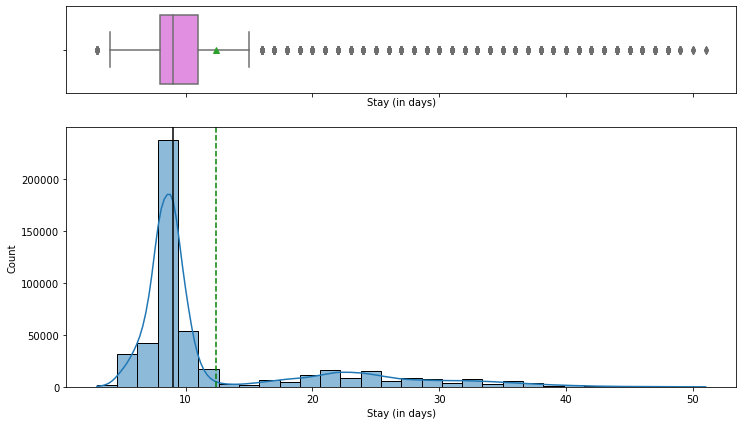

In [13]:
histogram_boxplot(data, "Stay (in days)", kde = True, bins = 30)

**Observations:**

- There are **fewer patients staying more than 10 days in the hospital and very few who stay for more than 40 days**. This might be because the majority of patients are admitted for moderate or minor illnesses. 
- The peak of the distribution shows that most of the patients stay for 8-9 days in the hospital. 

### **Admission Deposit**

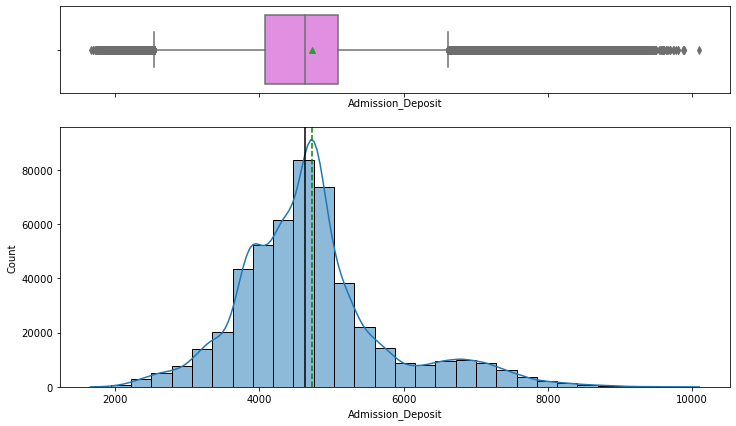

In [14]:
histogram_boxplot(data, "Admission_Deposit", kde = True, bins = 30)

**Observations:**

- The **distribution of the admission fees is close to normal with outliers on both sides**. 
- Few patients are paying a high amount of admission fees and few patients are paying a low amount of admission fees.

### **Number of Visitors with the Patient**

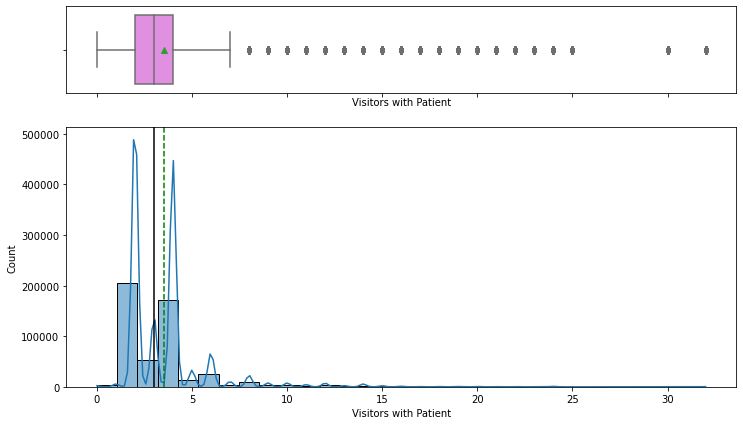

In [15]:
histogram_boxplot(data, "Visitors with Patient", kde = True, bins = 30)

**Observations:**

- The distribution of the number of visitors with the patient is **highly skewed towards the right**.
- **2 and 4 are the most common number of visitors with patients.**

### **Bivariate Analysis**

<AxesSubplot:>

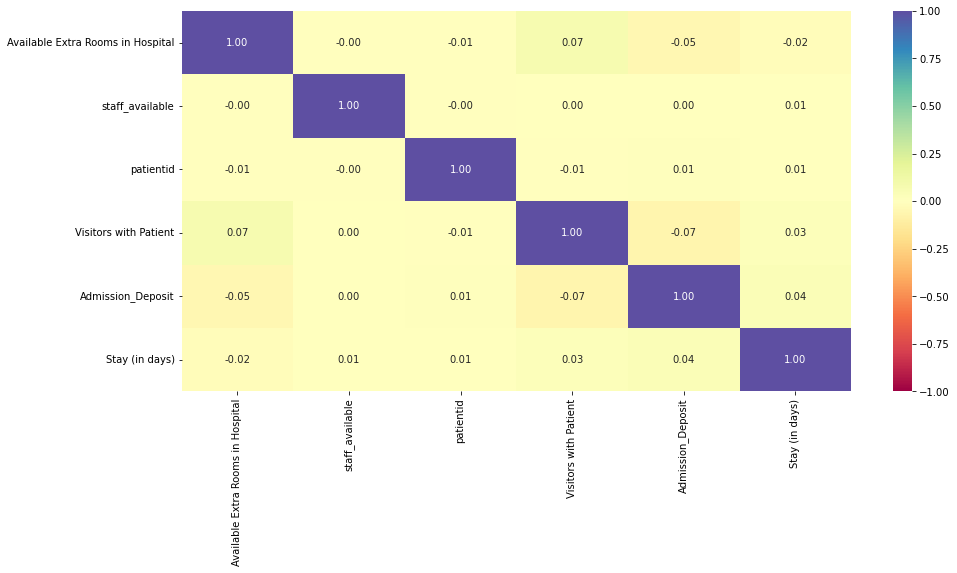

In [16]:
# Finding the correlation between various columns of the dataset

import seaborn as sns

import matplotlib.pyplot as plt

plt.figure(figsize = (15, 7))

sns.heatmap(data.corr(), annot = True, vmin = -1, vmax = 1, fmt = ".2f", cmap = "Spectral")

**Observations:** 
- The heatmap shows that there is **no correlation (very close to 0) between variables**.
- The continuous variables show no correlation with the target variable (Stay (in days)) which indicates that the **categorical variables might be more important for the prediction.**

In [17]:
# Function to plot stacked bar plots

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    
    predictor: independent variable
    
    target: target variable
    """
    count = data[predictor].nunique()
    
    sorter = data[target].value_counts().index[-1]
    
    tab1 = pd.crosstab(data[predictor], data[target], margins = True).sort_values(
        by = sorter, ascending = False
    )
    
    print(tab1)
    
    print("-" * 120)
    
    tab = pd.crosstab(data[predictor], data[target], normalize = "index").sort_values(
        by = sorter, ascending = False
    )
    
    tab.plot(kind = "bar", stacked = True, figsize = (count + 1, 5))
    
    plt.legend(
        loc = "lower left",
        frameon = False,
    )
    
    plt.legend(loc = "upper left", bbox_to_anchor = (1, 1))
    
    plt.show()

**Let's start by checking the distribution of the LOS for the various wards.**

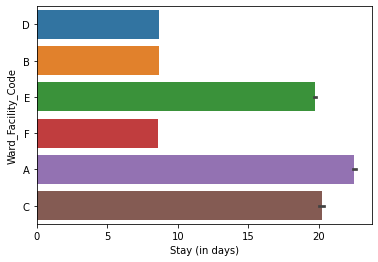

In [18]:
sns.barplot(y = 'Ward_Facility_Code', x = 'Stay (in days)', data = data)

plt.show()

**Observation:**

- The hypothesis we made earlier is correct, i.e., **wards A and C have the patients staying for the longest duration.**

Department          TB & Chest disease  anesthesia  gynecology  radiotherapy  \
Ward_Facility_Code                                                             
A                                 4709       15611           0         21093   
All                              22890       44179      343478         84315   
B                                    0           0      103885             0   
C                                 1319        4199           0          9079   
D                                    0           0      119055             0   
E                                16862       24369           0         54143   
F                                    0           0      120538             0   

Department          surgery     All  
Ward_Facility_Code                   
A                      5138   46551  
All                    5138  500000  
B                         0  103885  
C                         0   14597  
D                         0  119055  
E            

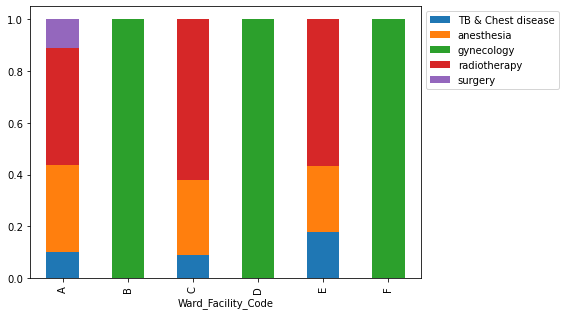

In [19]:
stacked_barplot(data, "Ward_Facility_Code", "Department")

**Observations:**

- **Ward facilities B, D, and F are dedicated only to the gynecology department.**
- Wards A, C, and E have patients with all other diseases, and patients undergoing surgery are admitted to ward A only.

**Usually, the more severe the illness, the more the LOS, let's check the distribution of severe patients in various wards.**

Severity of Illness  Extreme   Minor  Moderate     All
Ward_Facility_Code                                    
All                    88266  131537    280197  500000
D                      29549   27220     62286  119055
B                      24222   23579     56084  103885
A                      13662    7877     25012   46551
E                      11488   22254     61632   95374
F                       5842   47594     67102  120538
C                       3503    3013      8081   14597
------------------------------------------------------------------------------------------------------------------------


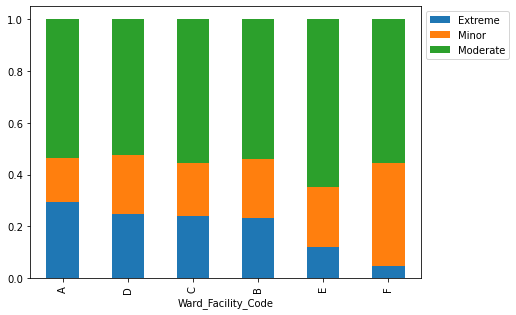

In [20]:
stacked_barplot(data, "Ward_Facility_Code", "Severity of Illness")

**Observations:**

- Ward A has the most extreme cases as well as the longest length of stay in the hospital. It might require more staff and resources as compared to other wards.
- Ward F has a large number of minor cases and Ward E has a large number of moderate cases.

**Age can also be an important factor to find the length of stay. Let's check the same.**

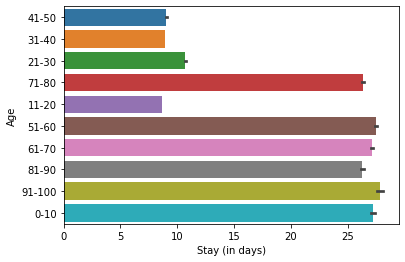

In [21]:
sns.barplot(y = 'Age', x = 'Stay (in days)', data = data )

plt.show()

**Observations:**

- **Patients aged between 0-10 and 51-100 tend to stay the most number of days in the hospital.** This might be because the majority of the patients in the 21-50 age group get admitted to the gynecology department, and patients in age groups 1-10 and 5-100 might get admitted due to some other serious illness.

## **Data Preparation for Model Building**

- Before we proceed to build a model, we'll have to encode categorical features.
- Separate independent variables and the dependent variable.
- We'll split the data into train and test to be able to evaluate the model that we train on the training data.

In [22]:
# Creating dummy variables for the categorical columns, drop_first = True is used to avoid redundant variables
data = pd.get_dummies(
    data,
    columns = data.select_dtypes(include = ["object", "category"]).columns.tolist(),
    drop_first = True,
)

In [23]:
# Checking the data after handling categorical data
data

,Available Extra Rooms in Hospital,staff_available,patientid,Visitors with Patient,Admission_Deposit,Stay (in days),Department_anesthesia,Department_gynecology,Department_radiotherapy,Department_surgery,Ward_Facility_Code_B,Ward_Facility_Code_C,Ward_Facility_Code_D,Ward_Facility_Code_E,Ward_Facility_Code_F,doctor_name_Dr John,doctor_name_Dr Mark,doctor_name_Dr Nathan,doctor_name_Dr Olivia,doctor_name_Dr Sam,doctor_name_Dr Sarah,doctor_name_Dr Simon,doctor_name_Dr Sophia,Age_11-20,Age_21-30,Age_31-40,Age_41-50,Age_51-60,Age_61-70,Age_71-80,Age_81-90,Age_91-100,gender_Male,gender_Other,Type of Admission_Trauma,Type of Admission_Urgent,Severity of Illness_Minor,Severity of Illness_Moderate,health_conditions_Diabetes,health_conditions_Heart disease,health_conditions_High Blood Pressure,health_conditions_None,health_conditions_Other,Insurance_Yes
0,4,0,33070,4,2966.408696,8,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1
1,4,2,34808,2,3554.835677,9,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0
2,2,8,44577,2,5624.733654,7,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1
3,4,7,3695,4,4814.149231,8,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0
4,2,10,108956,2,5169.269637,34,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,4,2,43001,3,4105.795901,10,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0
499996,13,8,85601,2,4631.550257,11,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
499997,2,3,22447,2,5456.930075,8,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
499998,2,1,29957,2,4694.127772,23,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0


In [24]:
# Dropping patientid from the data as it is an identifier and will not add value to the model

data = data.drop(columns = ["patientid"])

In [25]:
# Separating independent variables and the target variable
x = data.drop('Stay (in days)',axis = 1)

y = data['Stay (in days)'] 

In [26]:
# Splitting the dataset into train and test datasets

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, shuffle = True, random_state = 1)

In [27]:
# Checking the shape of the train and the test data

print("Shape of Training set : ", x_train.shape)

print("Shape of test set : ", x_test.shape)

Shape of Training set :  (400000, 42)
Shape of test set :  (100000, 42)


## **Model Building**

* We will be using different metrics functions defined in sklearn like RMSE, MAE, and 𝑅2 for regression model evaluation.
* We will define a function to calculate MAPE and the adjusted 𝑅2.
* The mean absolute percentage error (MAPE) measures the accuracy of predictions as a percentage and can be calculated as the average absolute percent error for each predicted value minus the actual value divided by the actual value. It works best if there are no extreme values in the data and none of the actual values are 0.

In [28]:
# Function to compute the adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    
    r2 = r2_score(targets, predictions)
    
    n = predictors.shape[0]
    
    k = predictors.shape[1]
    
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# Function to compute MAPE

def mape_score(targets, predictions):
    
    return np.mean(np.abs(targets - predictions) / targets) * 100


# Function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    
    predictors: independent variables
    
    target: dependent variable
    """

    # Predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)                      # To compute R-squared
    
    adjr2 = adj_r2_score(predictors, target, pred)   # To compute adjusted R-squared
    
    rmse = np.sqrt(mean_squared_error(target, pred)) # To compute RMSE
    
    mae = mean_absolute_error(target, pred)          # To compute MAE
    
    mape = mape_score(target, pred)                  # To compute MAPE

    # Creating a dataframe of metrics
    
    df_perf = pd.DataFrame(
        {
            "RMSE":  rmse,
            "MAE":  mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        
        index = [0],
    )

    return df_perf

In [29]:
# RMSE
def rmse(predictions, targets):
    return np.sqrt(((targets - predictions) ** 2).mean())


# MAPE
def mape(predictions, targets):
    return np.mean(np.abs((targets - predictions)) / targets) * 100


# MAE
def mae(predictions, targets):
    return np.mean(np.abs((targets - predictions)))


# Model performance on the test and the train data

def model_pref(olsmodel, x_train, x_test, y_train,y_test):

    # Prediction on the training data
    y_pred_train = olsmodel.predict(x_train)
    y_observed_train = y_train

    # Prediction on the test data
    y_pred_test = olsmodel.predict(x_test)
    y_observed_test = y_test

    print(
        pd.DataFrame(
            {
                "Data": ["Train", "Test"],
                "RMSE": [
                    rmse(y_pred_train, y_observed_train),
                    rmse(y_pred_test, y_observed_test),
                ],
                
                "MAE": [
                    mae(y_pred_train, y_observed_train),
                    mae(y_pred_test, y_observed_test),
                ],
                
                "MAPE": [
                    mape(y_pred_train, y_observed_train),
                    mape(y_pred_test, y_observed_test),
                ],
            }
        )
    ) 

In [30]:
import statsmodels.api as sm

# Statsmodel api does not add a constant by default, we need to add it explicitly
x_train1 = sm.add_constant(x_train)

# Add constant to the test data
x_test1 = sm.add_constant(x_test)

# Create the model
olsmodel1 = sm.OLS(y_train, x_train1).fit()

# Get the model summary
olsmodel1.summary()

print(olsmodel1.summary())

                            OLS Regression Results                            
Dep. Variable:         Stay (in days)   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                 5.643e+04
Date:                Fri, 29 Apr 2022   Prob (F-statistic):               0.00
Time:                        18:30:58   Log-Likelihood:            -1.0246e+06
No. Observations:              400000   AIC:                         2.049e+06
Df Residuals:                  399961   BIC:                         2.050e+06
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [31]:
lin_reg_test = model_performance_regression(olsmodel1, x_test1, y_test)
lin_reg_test

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,3.144036,2.155759,0.84303,0.842962,19.676874


- We can see that the `R-squared` for the model is `0.84`. 
- Not all the variables are statistically significant enough to predict the outcome variable. To check which ones are statistically significant or have enough predictive power to predict the target variable, we need to check the `p-value` against all the independent variables.

**Interpreting the Regression Results:**

1. **Adjusted R-squared**: It reflects the fit of the model.
    - R-squared values range from 0 to 1, where a higher value generally indicates a better fit, assuming certain conditions are met.
    - In our case, the value for Adj. R-squared is **0.84**

2. **coef**: It represents the change in the output Y due to a change of one unit in the variable (everything else held constant).

3. **std err**: It reflects the level of accuracy of the coefficients.
    - The lower it is, the more accurate the coefficients are

4. **P > |t|**: The p-value:
   
   * Pr(>|t|): For each independent feature there is a null hypothesis and an alternate hypothesis 

    **Ho:** Null Hypothesis - The independent feature is not significant 
   
    **Ha:** Alternate Hypothesis - The independent feature is significant 
    
   * A p-value of less than 0.05 is considered to be statistically significant with a 95% confidence level
   
5. **Confidence Interval**: It represents the range in which is likely to contain the true value of the coefficients (with a likelihood of 95%).

* Both the **R-squared and Adjusted R-squared of the model are around 84%**. This is a clear indication that we have been able to create a good model that can explain variance in the LOS of patients for up to 84%.

* We can examine the significance of the regression model, and try dropping insignificant variables.

In [129]:
model_pref(olsmodel1, x_train1, x_test1, y_train,y_test)

    Data      RMSE       MAE       MAPE
0  Train  3.135092  2.146240  19.591781
1   Test  3.144036  2.155759  19.676874


**The Root Mean Squared Error** of train and test data is **not very different**, indicating that **our model is not overfitting** to the training data.

Mean Absolute Error (MAE) indicates that our current model can predict LOS of patients within **mean error of 2.15 days** on the test data.

The units of both RMSE and MAE are on the same - days in this case. But RMSE is greater than MAE because it penalizes the outliers more.

**Mean Absolute Percentage Error is ~19%** on the test data.

## **Dropping the insignificant variables and creating the regression model again**

### **Examining the significance of the model**

It is not enough to just fit a multiple regression model to the data, it is also necessary to check whether all the regression coefficients are significant or not. The significance here means whether the population regression parameters are significantly different from zero.

From the above it may be noted that the regression coefficients corresponding to `staff_available`, `Visitors with Patient`, `Ward_Facility_Code_F`, `Age_81-90`, `gender_Other`, `health_conditions_High Blood Pressure`, `health_conditions_None`, `health_conditions_Other`, and `Insurance_Yes` **are not statistically significant for α = 0.05.** In other words, the regression coefficients corresponding to these three are not significantly different from 0 in the population. 

**Hence, we will eliminate these nine features and create a new model.**

In [130]:
# Dropping the specified features
x_train2 = x_train1.drop(columns = {'staff_available', 'Visitors with Patient', 'Ward_Facility_Code_F', 'Age_81-90', 'gender_Other', 'health_conditions_High Blood Pressure', 'health_conditions_None', 'health_conditions_Other', 'Insurance_Yes'})

x_test2 = x_test1.drop(columns = {'staff_available', 'Visitors with Patient', 'Ward_Facility_Code_F', 'Age_81-90', 'gender_Other', 'health_conditions_High Blood Pressure', 'health_conditions_None', 'health_conditions_Other', 'Insurance_Yes'})

# Create the model after dropping the 9 features
olsmodel2 = sm.OLS(y_train, x_train2).fit()

# Get the model summary
olsmodel2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Stay (in days)   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                 7.148e+04
Date:                Thu, 28 Apr 2022   Prob (F-statistic):               0.00
Time:                        18:33:04   Log-Likelihood:            -1.0246e+06
No. Observations:              400000   AIC:                         2.049e+06
Df Residuals:                  399969   BIC:                         2.050e+06
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                19.8738      0.038    523.436      0.000      19.799      19.948
Available Extra Rooms in Hospital     0.0786      0.002     42.396      0.000       0.075       0.082
Admission_Deposit                 -3.842e-05   4.77e-06     -8.050      0.000   -4.78e-05   -2.91e-05
Department_anesthesia                 6.0820      0.029    210.267      0.000       6.025       6.139
Department_gynecology                 0.4666      0.021     22.502      0.000       0.426       0.507
Department_radiotherapy              -4.6220      0.037   -126.346      0.000      -4.694      -4.550
Department_surgery                    9.6826      0.043    222.975      0.000       9.597       9.768
Ward_Facility_Code_B                  0.2534      0.015     16.602      0.000       0.223       0.283
Ward_Facility_Code_C                  0.4347      0.034     12.608      0.000       0.367       0.502
Ward_Facility_Code_D                  0.1996      0.015     13.533      0.000       0.171       0.229
Ward_Facility_Code_E                  0.3091      0.021     14.472      0.000       0.267       0.351
doctor_name_Dr John                   7.2507      0.027    269.528      0.000       7.198       7.303
doctor_name_Dr Mark                   1.1926      0.033     36.563      0.000       1.129       1.257
doctor_name_Dr Nathan                -0.2049      0.015    -13.775      0.000      -0.234      -0.176
doctor_name_Dr Olivia                -0.3493      0.014    -24.546      0.000      -0.377      -0.321
doctor_name_Dr Sam                    1.2814      0.038     33.869      0.000       1.207       1.356
doctor_name_Dr Sarah                  0.8043      0.015     53.972      0.000       0.775       0.834
doctor_name_Dr Simon                  6.1498      0.069     89.699      0.000       6.015       6.284
doctor_name_Dr Sophia                 0.2165      0.021     10.519      0.000       0.176       0.257
Age_11-20                           -12.7257      0.042   -306.351      0.000     -12.807     -12.644
Age_21-30                           -10.4708      0.036   -288.736      0.000     -10.542     -10.400
Age_31-40                           -13.4232      0.036   -375.422      0.000     -13.493     -13.353
Age_41-50                           -13.4992      0.036   -370.479      0.000     -13.571     -13.428
Age_51-60                            -0.3542      0.041     -8.721      0.000      -0.434      -0.275
Age_61-70                            -0.4094      0.039    -10.384      0.000      -0.487      -0.332
Age_71-80                            -0.2070      0.042     -4.966      0.000      -0.289      -0.125
Age_91-100                           -0.2482      0.100     -2.477      0.013      -0.445      -0.052
gender_Male            

In [131]:
lin_reg_test = model_performance_regression(olsmodel2, x_test2, y_test)
lin_reg_test

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,3.144105,2.155755,0.843023,0.84297,19.676739


### **Checking the performance of the model on the train and the test data**

In [132]:
model_pref(olsmodel2, x_train2, x_test2, y_train, y_test)

    Data      RMSE       MAE       MAPE
0  Train  3.135121  2.146261  19.591892
1   Test  3.144105  2.155755  19.676739


**Observation:**

* RMSE, MAE, and MAPE of the train and the test data are not very different, indicating that the **model is not overfitting and has generalized well.**

### **Applying the cross validation technique to improve the model and evaluating it using different evaluation metrics**

In [133]:
# Import the required function
from sklearn.model_selection import cross_val_score

# Build the regression model using sklearn linear regression
linearregression = LinearRegression()                                    

# cv = 10 indicates that the data is divided into 10 folds
cv_Score11 = cross_val_score(linearregression, x_train, y_train, cv = 10)

cv_Score12 = cross_val_score(linearregression, x_train, y_train, cv = 10, 
                             scoring = 'neg_mean_squared_error')                                  

print("RSquared: %0.3f (+/- %0.3f)" % (cv_Score11.mean(), cv_Score11.std() * 2))

print("Mean Squared Error: %0.3f (+/- %0.3f)" % (-1 * cv_Score12.mean(), cv_Score12.std() * 2))

RSquared: 0.843 (+/- 0.004)
Mean Squared Error: 9.832 (+/- 0.296)


**Observation:**
- The results from the cross-validation are similar to the results we got on the training and the testing data.

We may want to reiterate the model building process with new features or better feature engineering to increase the R-squared and decrease the MSE on cross-validation.

In [134]:
# Using the params method to get the coefficients of the model
coef = olsmodel2.params

coef

const                                19.873791
Available Extra Rooms in Hospital     0.078619
Admission_Deposit                    -0.000038
Department_anesthesia                 6.082010
Department_gynecology                 0.466594
Department_radiotherapy              -4.621989
Department_surgery                    9.682582
Ward_Facility_Code_B                  0.253351
Ward_Facility_Code_C                  0.434731
Ward_Facility_Code_D                  0.199594
Ward_Facility_Code_E                  0.309118
doctor_name_Dr John                   7.250669
doctor_name_Dr Mark                   1.192581
doctor_name_Dr Nathan                -0.204908
doctor_name_Dr Olivia                -0.349337
doctor_name_Dr Sam                    1.281366
doctor_name_Dr Sarah                  0.804327
doctor_name_Dr Simon                  6.149808
doctor_name_Dr Sophia                 0.216511
Age_11-20                           -12.725687
Age_21-30                           -10.470843
Age_31-40    

In [135]:
# Let us write the equation of the fit
Equation = "Stay (in days)="

print(Equation, end = '\t')

for i in range(len(coef)):
    
    print('(', coef[i], ') * ', coef.index[i], '+', end = ' ')

Stay (in days)=	( 19.87379120881513 ) *  const + ( 0.07861910039489392 ) *  Available Extra Rooms in Hospital + ( -3.842055619680103e-05 ) *  Admission_Deposit + ( 6.08200987687472 ) *  Department_anesthesia + ( 0.46659368247342103 ) *  Department_gynecology + ( -4.621988990506784 ) *  Department_radiotherapy + ( 9.68258206756855 ) *  Department_surgery + ( 0.2533508305244102 ) *  Ward_Facility_Code_B + ( 0.4347314177734212 ) *  Ward_Facility_Code_C + ( 0.19959404619904084 ) *  Ward_Facility_Code_D + ( 0.3091175655422771 ) *  Ward_Facility_Code_E + ( 7.250668829257773 ) *  doctor_name_Dr John + ( 1.1925809939249885 ) *  doctor_name_Dr Mark + ( -0.20490771930672766 ) *  doctor_name_Dr Nathan + ( -0.3493369266066516 ) *  doctor_name_Dr Olivia + ( 1.2813656355905274 ) *  doctor_name_Dr Sam + ( 0.8043274273889113 ) *  doctor_name_Dr Sarah + ( 6.1498081278696155 ) *  doctor_name_Dr Simon + ( 0.21651090099786324 ) *  doctor_name_Dr Sophia + ( -12.725686771115 ) *  Age_11-20 + ( -10.470843324

### **Interpreting our Regression Coefficients**

With our linear regression model's adjusted R-squared value of around 0.84, we can capture **84% of the variation** in the target variable.

The p-values for these variables are < 0.05 in our final model, meaning they are statistically significant

* The Stay (in days) decreases with an increase in Department_radiotherapy. 1 unit increase in the Department_radiotherapy leads to a decrease of Stay (in days) ~ 4.62 times the Stay (in days) when everything else is constant.

* The Stay (in days) increases with an increase in Department_anesthesia. 1 unit increase in Department_anesthesia leads to an increase of Stay (in days) ~ 6.08 times the Stay (in days) when everything else is constant. This is understandable, as anesthesia is used in severe cases which results in more days of stay.

* The Stay (in days) increases with an increase in Department_surgery. 1 unit increase in Department_surgery leads to an increase of Stay (in days) ~ 9.68 times the Stay (in days) when everything else is constant. This is understandable, as surgery is conducted in severe cases which results in more days of stay.

* The Stay (in days) increases with an increase in doctor_name_Dr Simon. 1 unit increase in doctor_name_Dr Simon leads to an increase of Stay (in days) ~ 6.14 times the Stay (in days) when everything else is constant. This is understandable, as surgery cases are handled by Dr.Simon.

* The Stay (in days) decreases with an increase in Age_11-20. 1 unit increase in the Age_11-20 leads to a decrease of Stay (in days) ~ 12.72 times the Stay (in days) when everything else is constant. This is understandable since young age people tend to have less severe problems.

* The Stay (in days) decreases with an increase in Age_21-30. 1 unit increase in the Age_21-30 leads to a decrease of Stay (in days) ~ 10.47 times the Stay (in days) when everything else is constant. This is understandable since young age people tend to have less severe problems.

### **Ridge Regression**

In [136]:
rdg = Ridge()

In [137]:
rdg.fit(x_train, y_train)

model_pref(rdg, x_train, x_test, y_train, y_test)

    Data      RMSE       MAE       MAPE
0  Train  3.135092  2.146301  19.592776
1   Test  3.144039  2.155819  19.677875


In [138]:
ridge_regression_perf_test = model_performance_regression(rdg, x_test, y_test)

ridge_regression_perf_test

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,3.144039,2.155819,0.84303,0.842964,19.677875


Ridge regression is producing similar results in comparison to Linear Regression without regularization.

There is some scope to improve the model's performance, as there is a feeling that we are not able to fully model the relationship using linear models.

Let's now build **Non-Linear Regression models** like Decision Tree Regressors and Random Forest Regressors and check their performance.

### **Decision Tree Regressor**

In [139]:
# Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state = 1)

# Fitting the model
dt_regressor.fit(x_train, y_train)

# Model Performance on test data i.e prediction
dt_regressor_perf_test = model_performance_regression(dt_regressor, x_test, y_test)

dt_regressor_perf_test

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,1.81515,1.12829,0.94768,0.947658,9.341248


### **Tuning the Decision Tree Regressor**

In [140]:
# Choose the type of regressor 
dtree_tuned = DecisionTreeRegressor(random_state = 1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2, 8), 
              
              'criterion': ['squared_error', 'friedman_mse'],
              
              'min_samples_leaf': [1, 3, 5, 7],
              
              'max_leaf_nodes': [2, 5, 7] + [None]
             }

# Type of scoring used to compare parameter combinations
scorer = make_scorer(r2_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_tuned, parameters, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(x_train,y_train)

# Set the dtree_tuned_regressor to the best combination of parameters
dtree_tuned_regressor = grid_obj.best_estimator_

dtree_tuned_regressor.fit(x_train, y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=7, min_samples_leaf=3,
                      random_state=1)

**We have tuned the model and fit the tuned model on the training data. Now, let's check the model performance on the testing data**

In [141]:
# Get the score of tuned decision tree regressor
dtree_tuned_regressor_perf_test = model_performance_regression(dtree_tuned_regressor, x_test, y_test)

In [142]:
dtree_tuned_regressor_perf_test

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,1.741743,1.161072,0.951826,0.951806,9.64668


**Let's look at the feature importance of the tuned decision tree model.**

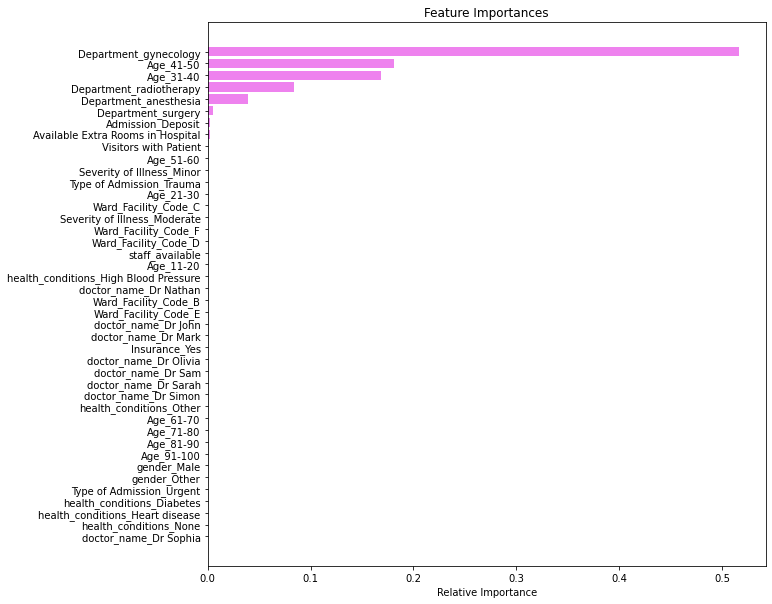

In [143]:
# Plotting the feature importance
features = list(x.columns)

importances = dtree_tuned_regressor.feature_importances_

indices = np.argsort(importances)

plt.figure(figsize = (10, 10))

plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')

plt.yticks(range(len(indices)), [features[i] for i in indices])

plt.xlabel('Relative Importance')

plt.show()

**Observations:**

- **Department_gynecology, Age_41_50, and Age_31_40 are the most important features** followed by Department_anesthesia, Department_anesthesia, and Department_surgery.
- The rest of the variables have no impact in this model to decide the duration of the stay in the hospital.

### **Bagging Regressor**

In [144]:
# Bagging Regressor
bagging_estimator = BaggingRegressor(random_state = 1)

# Fitting the model
bagging_estimator.fit(x_train, y_train)

# Model Performance on the test data
bagging_estimator_perf_test = model_performance_regression(bagging_estimator, x_test, y_test)

bagging_estimator_perf_test

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,1.36894,0.905205,0.970242,0.970229,7.648842


### **Tuned Bagging Regressor** 

In [145]:
# Choose the type of regressor
bagging_tuned = BaggingRegressor(random_state = 1)

# Grid of parameters to choose from
parameters = {"n_estimators": [10, 15, 20],
              
              "max_samples": [0.8, 1],
              
              "max_features": [0.8, 1]
             }

# Type of scoring used to compare parameter combinations
scorer = make_scorer(r2_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_tuned, parameters, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(x_train, y_train)

# Set the bagging_tuned_regressor to the best combination of parameters
bagging_tuned_regressor = grid_obj.best_estimator_

bagging_tuned_regressor.fit(x_train, y_train)

BaggingRegressor(max_features=0.8, max_samples=0.8, n_estimators=15,
                 random_state=1)

In [146]:
# Get the score of tuned Bagging tree regressor
bagging_tuned_regressor_perf_test = model_performance_regression(bagging_tuned_regressor, x_test, y_test)

bagging_tuned_regressor_perf_test

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,1.536988,1.032587,0.962487,0.962471,8.952246


**The bagging regressor has no attribute to calculate feature importance in the Sklearn library. So, let's move on to the next model.**

### **Random Forest Regressor**

In [147]:
# Random Forest Regressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 1)

# Fitting the model
regressor.fit(x_train, y_train)

# Model Performance on the test data
regressor_perf_test = model_performance_regression(regressor, x_test, y_test)

regressor_perf_test

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,1.303684,0.86505,0.973011,0.973,7.314995


### **Tuned Random Forest Regressor**

**NOTE:** Due to a large number of observations in the data, the code in the next cell for GridSearchCV might take 1-2 hours to run depending on the configuration of your system.  

In [148]:
rf_tuned = RandomForestRegressor(random_state = 1)

# Grid of parameters to choose from
parameters = {"n_estimators": [110, 120],
              
    "max_depth": [5, 7],
              
    "max_features": [0.8, 1]
             }

# Type of scoring used to compare parameter combinations
scorer = make_scorer(r2_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(x_train, y_train)

# Set the rf_tuned_regressor to the best combination of parameters
rf_tuned_regressor = grid_obj.best_estimator_

rf_tuned_regressor.fit(x_train, y_train)

RandomForestRegressor(max_depth=7, max_features=0.8, n_estimators=120,
                      random_state=1)

In [149]:
# Model Performance on the test data
rf_tuned_regressor_perf_test = model_performance_regression(rf_tuned_regressor, x_test, y_test)

rf_tuned_regressor_perf_test

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,1.722809,1.156349,0.952868,0.952848,9.640594


**Observations:**

- The performance of the tuned model is decreased as compared to the model with default parameters. 
- This might be because we have tried a very less number of hyperparameters and less number of values due to computational limits. We can certainly try to improve the performance of the model by tuning the model further.   

**Visualizing the feature importance**

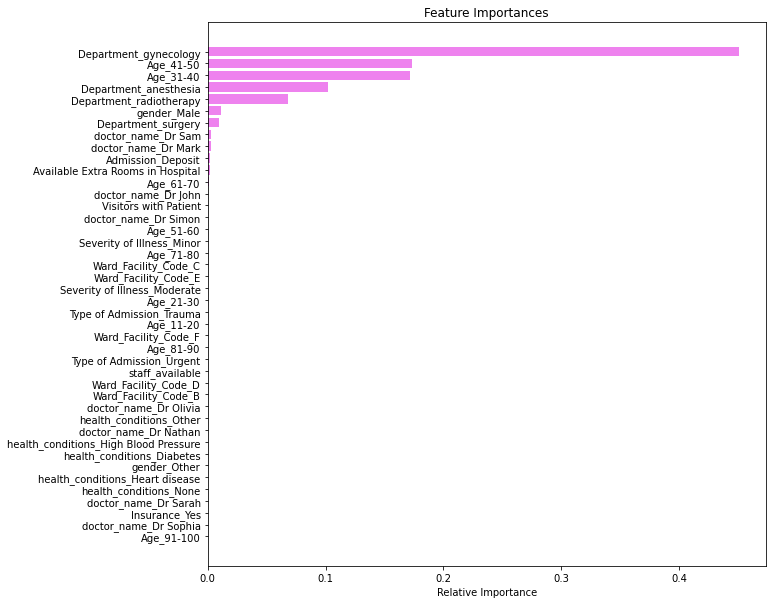

In [150]:
# Plotting the feature importance
importances = rf_tuned_regressor.feature_importances_

indices = np.argsort(importances)

plt.figure(figsize = (10, 10))

plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')

plt.yticks(range(len(indices)), [features[i] for i in indices])

plt.xlabel('Relative Importance')

plt.show()

**Observation:**

- The top 5 important variables are the same as the decision tree model. There are some other features like gender, and doctors adding some value to the model.

### **Model Performance Comparison**

In [151]:
models_test_comp_df = pd.concat(
    [
        lin_reg_test.T,
        ridge_regression_perf_test.T,
        dt_regressor_perf_test.T,
        regressor_perf_test.T,
        bagging_estimator_perf_test.T,
        dtree_tuned_regressor_perf_test.T,
        bagging_tuned_regressor_perf_test.T,
        rf_tuned_regressor_perf_test.T
    ],
    axis = 1,
)

models_test_comp_df.columns = [
    "Linear Regression",
    "Ridge Regression",
    "Decision tree regressor",
    "Random Forest regressor",
    "Bagging regressor",
    "Tuned Decision Tree regressor",
    "Tuned Bagging Tree regressor",
    "Tuned Random Forest Regressor"]

print("Test performance comparison:")

models_test_comp_df

Test performance comparison:


,Linear Regression,Ridge Regression,Decision tree regressor,Random Forest regressor,Bagging regressor,Tuned Decision Tree regressor,Tuned Bagging Tree regressor,Tuned Random Forest Regressor
RMSE,3.144105,3.144039,1.815150,1.303684,1.368940,1.741743,1.536988,1.722809
MAE,2.155755,2.155819,1.128290,0.865050,0.905205,1.161072,1.032587,1.156349
R-squared,0.843023,0.843030,0.947680,0.973011,0.970242,0.951826,0.962487,0.952868
Adj. R-squared,0.842970,0.842964,0.947658,0.973000,0.970229,0.951806,0.962471,0.952848
MAPE,19.676739,19.677875,9.341248,7.314995,7.648842,9.646680,8.952246,9.640594


**Observations:**

- All the other models are giving a good performance in terms of RMSE and R-squared when compared to linear and ridge regression.
- The bagging and random forest models are performing better than a single decision tree.
- The random forest model with default parameters is giving the best performance among all the trained models.

### **Fitting the chosen final model**

- Final Model Building - Random Forest Regressor
- We will consider Random Forest Regressor with default parameters as our final model.

In [152]:
final_model = RandomForestRegressor(n_estimators = 100, random_state = 1)

final_model.fit(x_train, y_train)

RandomForestRegressor(random_state=1)

In [153]:
final_model_perf_train = model_performance_regression(final_model, x_train, y_train)

In [154]:
final_model_perf_train

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.487743,0.321099,0.996195,0.996195,2.71949


* **Both the R-squared and the Adjusted R-squared of the model are approx 99.6% on the training data.** This indicates that the model can explain approx full variance in the target variable using the independent variables.

* Let's do a quick performance check on the test data.

In [155]:
final_model_test_perf = model_performance_regression(final_model, x_test, y_test)

print("Test Performance:")

final_model_test_perf

Test Performance:


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,1.303684,0.86505,0.973011,0.973,7.314995


* The model is giving good performance on the test data as well, i.e., the model is giving a generalized performance.
* The units of both RMSE and MAE are the same, days in this case. But RMSE is greater than MAE because it penalizes the outliers more.
* **The MAE < 1 indicates that the model can predict the length of stay within a mean error of 1 day,** which is a very good performance.
* **MAPE of 7.31 on the test data indicates that the model can predict within ~7% of the actual length of stay of patients.**

**Observations:**

1. Random Forest Regressor model gives the best results. It is successful in capturing ~97% of variations in the test data.
2. MAE of 0.86 indicates that the model can successfully predict the length of stay of a patient during admission with just an error of approximately 1 day. 
3. Factors like **visitors with patient** and **admission deposit** play an important role in the prediction.
4. Factors like **staff_available** and **extra rooms** has very less to do with the prediction from the model.

## **Business Insights and Recommendations**

- Gynecology is the busiest department of the hospital and it handles 68.7% of the total number of patients. It needs ample resources and staff for the smooth functioning of the department.
- The number of visitors with the patients highly influences the length of stay of a patient. The maximum number of visitors can go up to 32 which is very high. A restriction can be imposed on this.
- 74.2% of the patients are female. Thus, resources need to be procured while keeping this figure in mind.
- A large percentage of patients (89.3%) are in trauma or emergency during admission. An increase in ambulances and emergency rooms can reduce the risk of casualties.
- Ward A has the most number of patients who stay for the longest and the most serious patients. These wards can be equipped with more resources and staff to reduce the length of stay of these patients.
- Elderly patients (51-100) and children (1-10) stay for the longest. Extra attention to these age groups can lead to a faster discharge from the hospital.
- Wards D, E, and C have the most visitors with a patient. These wards will need more space and amenities like washrooms, shops, and lobbies for the visitors. Spaces can also be rented out to shop owners and advertisements to generate extra income.
- Finally, the Random Forest Regressor can predict the length of stay of the patient with just an error of 1 day. The hospital can use these predictions to allocate the resources and staff accordingly and reduce any kind of wastage. The hospital can also allocate the wards and doctors accordingly to optimize admissions even during emergencies.

## **Additional Content (Optional)**

## **Boosting Models**

Let's now look at the other kind of Ensemble technique knowns as Boosting

### **XGBoost**
- XGBoost stands for Extreme Gradient Boosting.
- XGBoost is a tree-based ensemble machine learning technique that improves prediction power and performance by improvising on the Gradient Boosting framework and incorporating reliable approximation algorithms. It is widely utilized and routinely appears at the top of competition leader boards in data science.

In [156]:
# Installing the xgboost library using the 'pip' command.
!pip install xgboost

In [157]:
# Importing the Random Forest Regressor and Bagging Regressor [Bagging]
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor

# Importing the AdaBoostRegressor and GradientBoostingRegressor [Boosting]
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor

# Importing the XGBReressor from the xgboost
from xgboost import XGBRegressor

In [158]:
# Adaboost Regressor
adaboost_model = AdaBoostRegressor(random_state = 1)

# Fitting the model
adaboost_model.fit(x_train, y_train)

# Model Performance on the test data
adaboost_model_perf_test = model_performance_regression(adaboost_model, x_test, y_test)

adaboost_model_perf_test

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,2.375388,1.58689,0.910399,0.910362,13.623722


In [159]:
# Gradient Boost Regressor
gbc = GradientBoostingRegressor(random_state = 1)

# Fitting the model
gbc.fit(x_train, y_train)

# Model Performance on the test data
gbc_perf_test = model_performance_regression(gbc, x_test, y_test)

gbc_perf_test

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,1.792721,1.212749,0.948965,0.948944,10.247284


In [160]:
# XGBoost Regressor
xgb = XGBRegressor(random_state = 1, eval_metric = 'logloss')

# Fitting the model
xgb.fit(x_train,y_train)

# Model Performance on the test data
xgb_perf_test = model_performance_regression(xgb, x_test, y_test)

xgb_perf_test

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,1.510606,1.033003,0.963764,0.963748,8.867275


### **Hyperparameter Tuning: Boosting**

Hyperparameter tuning is a great technique in machine learning to develop the model with optimal parameters. If the size of the data increases, the computation time will increase during the training process.
- For practice purposes, we have listed below some of the important hyperparameters for each algorithm that can be tuned to improve the model performance.

**1. Adaboost**

- - Some important hyperparameters that can be tuned:

 - **base_estimator** object, default = None
The base estimator from which the boosted ensemble is built. If None, then the base estimator is DecisionTreeRegressor initialized with max_depth = 3.
  - **n_estimators** int, default = 50
  The maximum number of estimators at which boosting is terminated. In the case of a perfect fit, the learning procedure is stopped early.
  
  - **loss:** {‘linear’, ‘square’, ‘exponential’}, default = ’linear’
The loss function to use when updating the weights after each boosting iteration.

 - **learning_rate** float, default = 1.0
Weight is applied to each regressor at each boosting iteration. A higher learning rate increases the contribution of each regressor.

**2. Gradient Boosting Algorithm**

- - Some important hyperparameters that can be tuned:

 - **n_estimators**: The number of boosting stages that will be performed.
 
 - **max_depth**: Limits the number of nodes in the tree. The best value depends on the interaction of the input variables.

  - **min_samples_split**: The minimum number of samples required to split an internal node.

  - **learning_rate**: How much the contribution of each tree will shrink.

  - **loss**:Loss function to optimize. 

For a better understanding of each parameter in the Gradient Boosting Regressor, please refer to this [source](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html#sklearn.ensemble.GradientBoostingRegressor).


**3. XGBoost Algorithm**

- - Some important hyperparameters that can be tuned:

 - **booster** [default = gbtree ] Which booster to use. Can be gbtree, gblinear, or dart; gbtree and dart use tree-based models while gblinear uses linear functions.
 
 - **min_child_weight** [default = 1]

   The minimum sum of instance weight (hessian) needed in a child. If the tree partition step results in a leaf node with the sum of instance weight less than min_child_weight, then the building process will give up further partitioning. In the linear regression task, this simply corresponds to the minimum number of instances needed to be in each node. The larger min_child_weight is, the more conservative the algorithm will be.

  For a better understanding of each parameter in the XGBoost Regressor, please refer to this [source](https://xgboost.readthedocs.io/en/stable/parameter.html).

### **Comparison of all the models we have built so far**

In [161]:
models_test_comp_df = pd.concat(
    [
        lin_reg_test.T,
        ridge_regression_perf_test.T,
        dt_regressor_perf_test.T,
        regressor_perf_test.T,
        bagging_estimator_perf_test.T,
        adaboost_model_perf_test.T,
        gbc_perf_test.T,
        xgb_perf_test.T
    ],
    axis = 1,
)

models_test_comp_df.columns = [
    "Linear Regression",
    "Ridge Regression",
    "Decision tree regressor",
    "Random Forest regressor",
    "Bagging regressor",
    "Adaboost regressor",
    "Gradientboost regressor",
    "XGBoost regressor"
]

print("Test performance comparison:")

Test performance comparison:


In [162]:
models_test_comp_df

,Linear Regression,Ridge Regression,Decision tree regressor,Random Forest regressor,Bagging regressor,Adaboost regressor,Gradientboost regressor,XGBoost regressor
RMSE,3.144105,3.144039,1.815150,1.303684,1.368940,2.375388,1.792721,1.510606
MAE,2.155755,2.155819,1.128290,0.865050,0.905205,1.586890,1.212749,1.033003
R-squared,0.843023,0.843030,0.947680,0.973011,0.970242,0.910399,0.948965,0.963764
Adj. R-squared,0.842970,0.842964,0.947658,0.973000,0.970229,0.910362,0.948944,0.963748
MAPE,19.676739,19.677875,9.341248,7.314995,7.648842,13.623722,10.247284,8.867275


**Observations:**

* With default parameters, the bagging methods outperform the boosting methods.
* **The Random Forest Regressor gives the best performance for this dataset.**